<a href="https://colab.research.google.com/github/essexgroup31/scrappy-doo/blob/main/Copy_of_Covid19_Twitter_SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [131]:
# Install Tweepy
#!pip install tweepy
# Install Matplotlib
#!pip install matplotlib
# Install Plotly
#!pip install plotly

In [132]:
def removeSuffix(item,suffix):
  if item.endswith(suffix):
    return item[:-len(suffix)]
  else:
    return item[:]

In [2]:
import string
# We need to remove punctuation because twitter users decide
# what their location is, so there's a lot of different ways that
# the users have their location, including "Essex, Uk" and "Essex/UK"
# hence we need to remove the punctuation

def punctuationRemover(sentence):
    myList = []
    for each in range(len(sentence)-1):
        if sentence[each] in string.punctuation:
            
            if sentence[each+1] in string.ascii_letters:
                myList.append(sentence[each])
                myList.append(" ")
            else:
                myList.append(sentence[each])
        else:
            myList.append(sentence[each])
                
    
    for each in range(len(myList)):
        if myList[each] in string.punctuation:
            myList[each] = "/"

    sentence = ""

    for each in myList:
        if each != "/":
          sentence = sentence + str(each)
    return sentence

In [134]:
# Seeing as we're dealing with counties,
# some counties have shire on the end of them
# and some can work both ways (oxford, oxfordshire)
# hence we need to strip the "shire" off the end
# unfortunately leaves us with some weird sounding
# counties XD, for instance "shrop" and "lanca"

def stripShire(sentence):
    sentence = sentence.split()
    completedsentence = []
    
    for each in sentence:
        completedsentence.append(removeSuffix(each, "shire"))
    

    return completedsentence

In [135]:
# twitter api connection

import re
import tweepy
from tweepy import OAuthHandler
consumer_api_key = 'uQP9N32xpuEIujXsDV2VgcekC'
consumer_api_secret = 'aLWDUV2P718ZoOicHCgpvQ8JUWgaOVcce14iA5oXGdtb0PsEV8' 
access_token = '1315962347836579840-WKXz7fp8UEZAaOtABYv1fIpoZpXX7q'
access_token_secret ='mitdeExvQ0SFuPGn3HsUhG0faElwQQPSE7FmhaZBNvh76'
print (consumer_api_key)
print (access_token)

uQP9N32xpuEIujXsDV2VgcekC
1315962347836579840-WKXz7fp8UEZAaOtABYv1fIpoZpXX7q


In [136]:
# twitter api authorization

authorizer = OAuthHandler(consumer_api_key, consumer_api_secret)
authorizer.set_access_token(access_token, access_token_secret)

In [137]:
# our own search_query incase someone
# doesn't want to use it for covid-related things

search_query = input("Hello user, what would you like to search?\nSearch: ")

Hello user, what would you like to search?
Search: covid19


In [138]:
api = tweepy.API(authorizer ,timeout=15, wait_on_rate_limit=True)
all_tweets = []
ukTweetList = []

for tweet_object in tweepy.Cursor(api.search,q=search_query+" -filter:retweets",lang='en',result_type='recent').items(500):
    all_tweets.append(tweet_object.text)
    # what we do here is we get the tweet object, and from that we can find the account that tweeted it
    # and then we just use the location that they have specified.
    if ("UK" or "United Kingdom") in tweet_object.user.location:
      ukTweetList.append(tweet_object)
      # and append it to a list of tweets
print(all_tweets)
    

["Almpst in tears here.\nSuch an amazing sight to behold.\nDefeating covid19 under hostile attacks on Victorians by outside influences with hateful chaos in their minds has made it gruelling but we're getting it done.\nWe got this Victoria.\n#covid19vic #covid19vicdata\n#IStandWithDan https://t.co/tXd0kpolQT", 'Here are some COVID-19 safety tips to help your family feel the thrill and fright of Halloween in 2020. #covid19… https://t.co/VMkud4gRuF', 'With #COVID19 vaccine development underway, our #HealthLit Book Club revisits “On Immunity: An Inoculation” by Eula… https://t.co/Z0hbCoiuOr', 'You know #Obama sent millions to the Wuhun_Lab in China where the #Covid19 was created! Is that not suspicious? Why… https://t.co/ZPEdHIy1RX', 'Viral Pic Of Baby Removing Doctor’s  Mask Becomes Symbol Of Hope\n"We all want a sign that we are going to take off… https://t.co/DNqyxXaCu1', '@JHochstat @RonRuggless Make way for the #heaterguy!\nRemember the #kettlebellguy? \n\n#covid19 #shortages #pandem

In [139]:
# need to specify the counties (without the "shire") so we can loop through them.
ukCounties = ["Bedford","Berk","Bristol","Buckingham","Cambridge","Ches","Cornwall","Cumbria","Derby","Devon","Dorset","Durham","Sussex","Essex","Gloucester","City of London", "Manchester", "Hamp","Hereford","Hertford","Isle of Wight", "Kent", "Lanca", "Leicester","Lincoln","London", "Merseyside", "Norfolk", "Northampton", "Northumberland", "North York", "Nottingham", "Oxford", "Rutland", "Shrop", "Somerset","South York", "Stafford", "Suffold", "Surrey", "Tyne and Wear", "Warwick", "West Midlands", "West Sussex", "West York", "Wilt", "Worcester"]
countyList = []
tweetLocationData = []


for each in ukTweetList:
    tweetData = each.text
    location = each.user.location
    
    # we get the tweet data and the location
    location = punctuationRemover(location)
    location = stripShire(location)

    found = False

    # and use this algorithm to put it into a 2d array where the start of each of the arrays
    # is the county, and everything after that is the actual tweet data (or the text)
    for x in location:
        if x in ukCounties:
            location = x
            if len(tweetLocationData) == 0:
                tweetLocationData.append([location,tweetData])
                countyList.append(location)
                break
            else:
                for each in tweetLocationData:
                  if each[0] == location:
                    found = True
                    break
                  else:
                    found = False
                
                if found == True:
                  each.append(tweetData)
                else:
                  tweetLocationData.append([location,tweetData])
                  # also append the counties list, just for debugging issues i needed to keep track of it
                  countyList.append(location)
            

print(tweetLocationData)

[['Surrey', 'Fame at last! A positive appearance in an @theeconomist article for #woking, to go alongside its Pizza Express noto… https://t.co/9W9RS8xnWP'], ['London', 'I totally support the stand Andy Burham and the other local leaders are taking on #manchesterlockdown. This is abou… https://t.co/sKAUbgxgXk', "In my next blog I reflect on why our mental health matters in these troubling times, let's keep on talking about ou… https://t.co/xsNNSLKOjG", 'TONIGHT: How has #Covid19 hit council finances?\n\nChief executives tell #Newsnight their local authorities might go… https://t.co/zZJE14cZwp', "BREAKING: Joe Biden's campaign team says he was on a plane with a person who tested positive for #COVID19 but says… https://t.co/UX5dY50dli", 'The #Chinese Job.\nHere it is in a chart, showing that #China is going to contribute the most (by far) than any othe… https://t.co/vcY6r9XiVY', '#Coronavirus: Queen and Prince William visit Dstl Porton Down without wearing masks.\n\nQueen Elizabeth undert

In [140]:
import numpy as np 
import pandas as pd 
import re  
import nltk # an amazing library to play with natural language
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [141]:
# reads the csv for our training data (data which we train our nodes on, this data includes both the tweets and the actual genuine semantic of the tweets)
# this means we train our nodes on genuine semantics. (hopefully leading to more genuine ai outputs)
tweets = pd.read_csv("https://raw.githubusercontent.com/kolaveridi/kaggle-Twitter-US-Airline-Sentiment-/master/Tweets.csv")
print(tweets)

                 tweet_id  ...               user_timezone
0      570306133677760513  ...  Eastern Time (US & Canada)
1      570301130888122368  ...  Pacific Time (US & Canada)
2      570301083672813571  ...  Central Time (US & Canada)
3      570301031407624196  ...  Pacific Time (US & Canada)
4      570300817074462722  ...  Pacific Time (US & Canada)
...                   ...  ...                         ...
14635  569587686496825344  ...                         NaN
14636  569587371693355008  ...                         NaN
14637  569587242672398336  ...                         NaN
14638  569587188687634433  ...  Eastern Time (US & Canada)
14639  569587140490866689  ...                         NaN

[14640 rows x 15 columns]


In [142]:
X = tweets.iloc[:, 10].values
y = tweets.iloc[:, 1].values

print(X)

['@VirginAmerica What @dhepburn said.'
 "@VirginAmerica plus you've added commercials to the experience... tacky."
 "@VirginAmerica I didn't today... Must mean I need to take another trip!"
 ... '@AmericanAir Please bring American Airlines to #BlackBerry10'
 "@AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??"
 '@AmericanAir we have 8 ppl so we need 2 know how many seats are on the next flight. Plz put us on standby for 4 people on the next flight?']


In [143]:
# processing the tweets so we remove all the characters, doesn't include some things
# for instance we could just get rid of the twitter url at the end but not enough time
# and doesn't make much difference in the grand scheme of things either
processed_tweets = []
 
for tweet in range(0, len(X)):  
    # Remove all the special characters
    processed_tweet = re.sub(r'\W', ' ', str(X[tweet]))
 
    # remove all single characters
    processed_tweet = re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_tweet)
 
    # Remove single characters from the start
    processed_tweet = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_tweet) 
 
    # Substituting multiple spaces with single space
    processed_tweet= re.sub(r'\s+', ' ', processed_tweet, flags=re.I)
 
    # Removing prefixed 'b'
    processed_tweet = re.sub(r'^b\s+', '', processed_tweet)
 
    # Converting to Lowercase
    processed_tweet = processed_tweet.lower()
 
    processed_tweets.append(processed_tweet)





In [144]:
from sklearn.feature_extraction.text import TfidfVectorizer  
tfidfconverter = TfidfVectorizer(max_features=2000, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))  
X = tfidfconverter.fit_transform(processed_tweets).toarray()


In [145]:
# here we are using a randomforest "learning technique" where it takes the modal value
# from the trees (n_estimators) as the value
from sklearn.ensemble import RandomForestClassifier
text_classifier = RandomForestClassifier(n_estimators=100, random_state=1)  
text_classifier.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [146]:
# we need a positive, negative and neutral counter for the pie chart to work
# and so we can get a better idea of people's opinion on said target

negativeCounter = 0
neutralCounter = 0
positiveCounter = 0

# again, processing tweets, still doesn't remove the twitter url
for tweet in all_tweets:
    # Remove all the special characters
    processed_tweet = re.sub(r'\W', ' ', tweet)
 
    # remove all single characters
    processed_tweet = re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_tweet)
 
    # Remove single characters from the start
    processed_tweet = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_tweet) 
 
    # Substituting multiple spaces with single space
    processed_tweet= re.sub(r'\s+', ' ', processed_tweet, flags=re.I)
 
    # Removing prefixed 'b'
    processed_tweet = re.sub(r'^b\s+', '', processed_tweet)
 
    # Converting to Lowercase
    processed_tweet = processed_tweet.lower()
 
    sentiment = text_classifier.predict(tfidfconverter.transform([ processed_tweet]).toarray())
    

    # We need to create something that counts the different sentiments
    # Which will then be the data for the pie chart.


    if sentiment == "positive":
      positiveCounter+=1
    elif sentiment == "negative":
      negativeCounter+=1
    elif sentiment == "neutral":
      neutralCounter+=1


print("Positive sentiments:",positiveCounter)
print("Negative sentiments:",negativeCounter)
print("Neutral sentiments:",neutralCounter)


Positive sentiments: 207
Negative sentiments: 2216
Neutral sentiments: 2577


In [147]:
sentiment_county_data = []
found = False
location = ""

# here i needed to take out all the tweets from the 2d list and 
# run the sentiment code on them to turn them into sentiments
# and then put them back into the 2d list

for each in range(len(tweetLocationData)):
    for index in tweetLocationData[each]:
        if index not in countyList:
            sentiment = text_classifier.predict(tfidfconverter.transform([index])).tolist()[0]
            location = tweetLocationData[each][0]
            if len(sentiment_county_data) == 0:
                sentiment_county_data.append([location, sentiment])
            else:
                for x in sentiment_county_data:
                    if x[0] == location:
                        found = True
                        break
                    else:
                        found = False
                if found == True:
                    x.append(sentiment)
                else:
                    sentiment_county_data.append([location,sentiment])



print(sentiment_county_data)

[['Surrey', 'neutral'], ['London', 'negative', 'neutral', 'neutral', 'negative', 'negative', 'neutral', 'negative', 'neutral'], ['Lincoln', 'neutral'], ['Durham', 'negative'], ['Leicester', 'neutral'], ['Devon', 'neutral'], ['Hamp', 'neutral'], ['Bristol', 'neutral'], ['Merseyside', 'neutral'], ['Manchester', 'negative'], ['Northampton', 'neutral']]


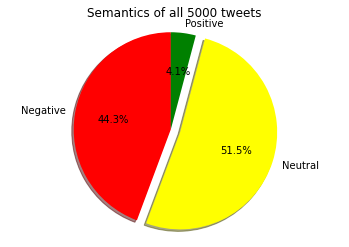

In [148]:
# import matplotlib which is a library used for plotting graphs and other such things
# to plot a pie chart specifically we need the three categories (negative,positive and neutral)
# the sizes of the categories, which is how many of each there are, using the counters from above
# the colours, and the explosion factor, which as far as i can tell just takes a certain part of the
# pie chart out a bit for better visualisation
import matplotlib.pyplot as pyplot
labels = "Negative", "Neutral", "Positive"
sizes = [negativeCounter,neutralCounter,positiveCounter]
colors = ["red","yellow","green"]

if sizes[0] > sizes[1] and sizes[0] > sizes[1]:
    explode = (0.1,0,0)
elif sizes[1] > sizes[0] and sizes[1] > sizes[2]:
    explode = (0,0.1,0)
else:
    explode = (0,0,0.1)
# script that takes the largest part of the pie chart out to visualise better

pyplot.pie(sizes,explode = explode, labels=labels,colors=colors,autopct="%1.1f%%", shadow=True, startangle=90)
pyplot.axis("equal")
pyplot.title("Semantics of all " + str(positiveCounter + negativeCounter + neutralCounter) + " tweets")
pyplot.show()


In [149]:
# I created this bit of code so that we could output the county that a tweet has come from,
# the semantic and we could use this to gain insight on if and how different counties respond
# to the same thing in different ways.
for each in range(len(sentiment_county_data)):
    negativeCounter = 0
    neutralCounter = 0
    positiveCounter = 0
    for x in sentiment_county_data[each]:
        current_location = sentiment_county_data[each][0]  
        if x == "positive":
            positiveCounter+=1
        elif x == "negative":
            negativeCounter+=1
        elif x == "neutral":
            neutralCounter+=1
        
    print("County: ", current_location, "   ({} total tweets) ".format(positiveCounter + negativeCounter + neutralCounter))
    print("Positive Tweets: ", positiveCounter)
    print("Negative Tweets: ", negativeCounter)
    print("Neutral Tweets : ", neutralCounter, "\n\n")

print(sentiment_county_data)

# A large draw-back of this entire piece of code (including all from above) is that
# all of the tweets we have taken from twitter, aren't necessarily from the uk, however
# we have taken the ones that are from the uk and put them into this. There are problems
# with this however, being that later times of the day, less people (in the uk) are on twitter.
# meaning we get less data as the day goes on. We could find a way around this by just 
# using twitter's geocode search function to scrape tweets specifically within the area
# however we tried to do this and couldn't find a way (within the specified amount of time)
# could probably have linked it up to the twitter time code function but didn't have enough time.
# 
# Another problem is that the pie chart shows all scraped data from twitter not just uk
# and that even if we do verify that a tweet is from the uk, if the author has spelled the county
# wrong or just said that they are from uk, and not from a specific county, we can't put that
# into our data.
#
# There are some more slight inconsistencies with companies registering their location as 
# the location of their uk office, us office etc etc. If this happens and the algorithm detects
# a county, the tweet will be put into the specified category. For instance if "CodingSolutionCompany"
# has an office in essex, uk and california, us. And they tweet something, it will go in the essex
# tweet set.

County:  Surrey    (1 total tweets) 
Positive Tweets:  0
Negative Tweets:  0
Neutral Tweets :  1 


County:  London    (8 total tweets) 
Positive Tweets:  0
Negative Tweets:  4
Neutral Tweets :  4 


County:  Lincoln    (1 total tweets) 
Positive Tweets:  0
Negative Tweets:  0
Neutral Tweets :  1 


County:  Durham    (1 total tweets) 
Positive Tweets:  0
Negative Tweets:  1
Neutral Tweets :  0 


County:  Leicester    (1 total tweets) 
Positive Tweets:  0
Negative Tweets:  0
Neutral Tweets :  1 


County:  Devon    (1 total tweets) 
Positive Tweets:  0
Negative Tweets:  0
Neutral Tweets :  1 


County:  Hamp    (1 total tweets) 
Positive Tweets:  0
Negative Tweets:  0
Neutral Tweets :  1 


County:  Bristol    (1 total tweets) 
Positive Tweets:  0
Negative Tweets:  0
Neutral Tweets :  1 


County:  Merseyside    (1 total tweets) 
Positive Tweets:  0
Negative Tweets:  0
Neutral Tweets :  1 


County:  Manchester    (1 total tweets) 
Positive Tweets:  0
Negative Tweets:  1
Neutral Tweet